# Extracting Email addresses from images using Tesseract OCR, OpenCV and RegEx

With the increasing number of job applications, it's becoming more common for companies to receive resumes in image formats. To facilitate the selection process, it's important that the information contained in these resumes be extracted accurately and efficiently. Among the most relevant pieces of information are the email addresses of the candidates, which are fundamental for later contact.

The objective of this project is to develop a system capable of automatically extracting email addresses from resume images. To achieve this, tools such as Tesseract, OpenCV, and regex will be used, which enable image reading and processing, as well as text pattern identification.


In [1]:
!pip install opencv-python==4.6.0.66
!pip install pytesseract==0.3.9

## Importing libs

In [2]:
import pytesseract
import numpy as np
import cv2 
import re
import os
import matplotlib.pyplot as plt

## Reading directory

In [3]:
projeto = "Images/"
images = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(images)

['Images/6ef1386200cc8765c7e09f35faff7fc3.jpg', 'Images/821900a85bef0a4127b535c69031f63b.jpg', 'Images/df4er7489wq4rw8e1r2we1r34f65d4.jpg', 'Images/fiel-de-armazem.png', 'Images/u89ytr4u5y123fgy.jpg']


## Plotting images

In [4]:
def img_show(img): 
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

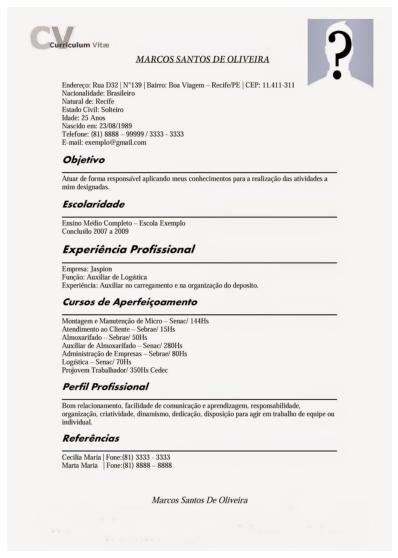

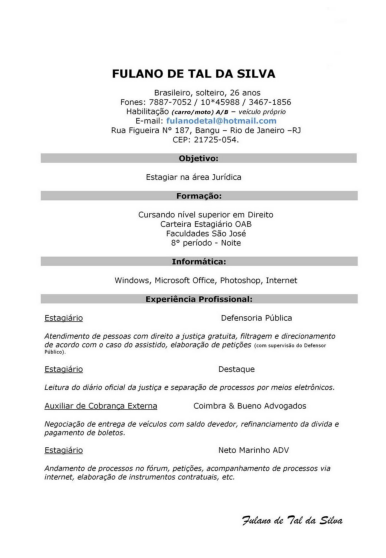

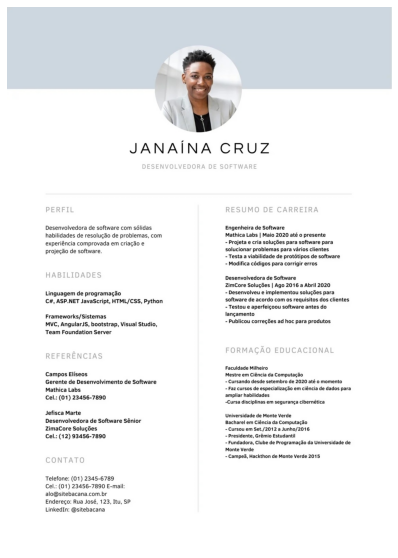

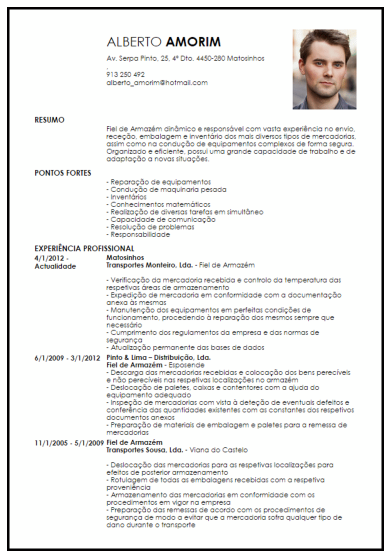

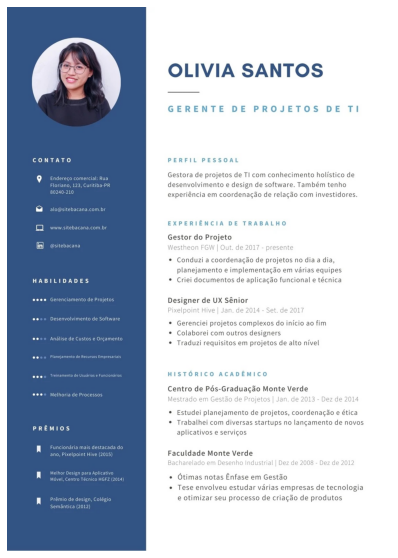

In [5]:
for img in images:
    image = cv2.imread(img)
    img_show(image)

## Detecting text in images

In [6]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [7]:
def img_to_str(img, lang='eng', config_tesseract="--tessdata-dir tessdata"):
  text = pytesseract.image_to_string(img, lang=lang, config=config_tesseract)
  return text

In [8]:
img_text_lst = []
for img in images:
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY)
    img_text = img_to_str(image)
    img_text_lst.append(img_text)

In [9]:
email_lst = []
for text in img_text_lst:
    match = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', text)
    print(match)
    for i in range(len(match)):
        email_lst.append(match[i])

['exemplo@gmail.com']
['fulanodetal@hotmail.com']
['alo@sitebacana.com.br']
['alberio_omorim@hotmal.com']
['alo@sitebacana.com.br']


## Writing email list into a txt file

In [10]:
filename = 'email_list.txt'

text_file = open(filename, "w")
for i in range(len(email_lst)):
    n = text_file.write(email_lst[i] + '\n')
text_file.close()

## Reading email list

In [11]:
email_list = open(filename,'r').read().split('\n')
for i in range(len(email_list)):
    print(email_list[i])

exemplo@gmail.com
fulanodetal@hotmail.com
alo@sitebacana.com.br
alberio_omorim@hotmal.com
alo@sitebacana.com.br

